## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df_ab_data = pd.read_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 3 - A B testing\\AnalyzeABTestResults 2\\ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Get info of all columns in the dataset
df_ab_data.info()

# Get the number of rows (and columns) of the dataset using info function
df_ab_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# Find the number of unique users in the dataset
df_ab_data.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Use head function to get the top 5 rows 
df_ab_data.head(5)

# Calculate the proportion of users converted - where converted = 1 means 
#they converted - meaning users who decided to pay for the company's product

df_ab_data[df_ab_data['converted'] == 1].shape[0]/df_ab_data.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Use head function to get the top 5 rows 
df_ab_data.head(5)

# Number of times the new_page and treatment don't line up
df_inconsistent_treatment = len(df_ab_data.query('group =="treatment" & landing_page != "new_page"'))
df_inconsistent_control = len(df_ab_data.query('group =="control" & landing_page != "old_page"'))

df_inconsistent_rows = df_inconsistent_treatment + df_inconsistent_control
df_inconsistent_rows

3893

f. Do any of the rows have missing values?

In [7]:
# Calculate to check if any of the rows have missing data
df_ab_data.isnull().sum()

#No rows have missing data

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Since we can't be sure if the row truly received the new or old page in above scenarios, we should be dropping these rows
indexNames_1 = df_ab_data[ (df_ab_data['group'] == 'treatment') & (df_ab_data['landing_page'] != 'new_page') ].index
indexNames_2 = df_ab_data[ (df_ab_data['group'] == 'control') & (df_ab_data['landing_page'] != 'old_page') ].index

df_ab_data.drop(indexNames_1, inplace = True)
df_ab_data.drop(indexNames_2, inplace = True)

df_ab_data.to_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 3 - A B testing\\AnalyzeABTestResults 2\\ab_data_edited.csv', index=False)

df2 = pd.read_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 3 - A B testing\\AnalyzeABTestResults 2\\ab_data_edited.csv')

df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Find the number of unique user_id's in df2 (new dataframe created after removing inconsistent 
#group/ landing page combination rows using the nunique function 

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Find the user_id repeated in df2 by using 'duplicated' function
repeat_user = df2[df2.duplicated(subset = 'user_id')]
repeat_user['user_id']

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# Pull the row info for the repeat user_id in df2 by using 'duplicated' function

df2[df2.duplicated(subset = 'user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# remove the row with duplicate user_id but keep your dataframe as df2

df2.drop_duplicates(inplace=True, subset = 'user_id')

# Confirm if the duplicate user_id row was removed
df2[df2.duplicated(subset = 'user_id')]

# Caclulate the new number of rows in df2 dataframe after duplicate user_id record was removed
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.head(5)

# Probability of an individual converting regardless of the page they receive

df2[df2['converted'] == 1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Probability of an individual converting if he/she was in the control group

df2.query('group == "control" and converted == 1').shape[0]/df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Probability of an individual converting if he/she was in the treatment group

df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('group == "treatment"').shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# Probability of an individual receiving the new page irrespecitve of any condition

df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

Statistical inference based on results a) through d) don't suggest enough that new treatment page leads to more conversions for couple of reasons

1) By plain probability calculations, the above questions only look to find the conversion rate using treatment vs control group - irrspective of the landing_page - new vs old

2) The conversion rate for new page using treatment group and old page using control group could be one metric that could be accounted while using that calculation and running multiple simulations across sample groups of the overall population represented in the dataset with the help of A/B testing (which will be handled in the next part)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypothesis : $H_{0}$: $p_{new}$ - $p_{old}$ <=0

Alternative Hypothesis : $H_{1}$: $p_{new}$ - $p_{old}$ >0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
convert_rate_new = df2.query('converted == 1').shape[0]/df2.shape[0]
convert_rate_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
convert_rate_old = df2.query('converted == 1').shape[0]/df2.shape[0]
convert_rate_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('group == "treatment"').shape[0]
new_page_converted

0.11880806551510564

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = df2.query('group == "control" and converted == 1').shape[0]/df2.query('group == "control"').shape[0]
old_page_converted

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

 ### The null hypothesis for this scenario states the treatment has no effect on the probability of conversion, hence $p_{new}$ - $p_{old}$  = 0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [24]:
# Simulate the experiment 10000 times by bootstrapping the sample data and calculate the difference in the mean 
# conversion rate of new and old ecommerce site pages

p_diffs = []
for _ in range(10000):
    b_samp = df2.sample(df2.shape[0], replace = True)
    new_page_converted = b_samp.query('group == "treatment"').converted.mean()
    old_page_converted = b_samp.query('group == "control"').converted.mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

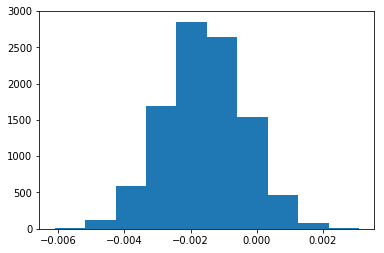

In [25]:
# Plot histogram to find the distribution of bootstrapped sample values
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [26]:
# Convert p_diffs value in array format
p_diffs = np.array(p_diffs)

In [27]:
# Observed difference in ab_data
new_page_converted = df2.query('group == "treatment"').converted.mean()
old_page_converted = df2.query('group == "control"').converted.mean()
obs_diff = new_page_converted - old_page_converted 

In [28]:
#Calculate sample's standard deviation 
sample_means_std = np.std(p_diffs)
sample_means_std

0.00120700797700366

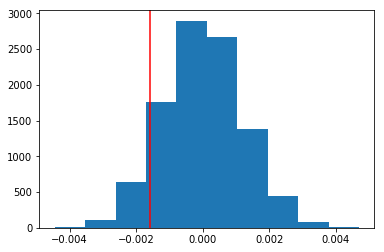

In [29]:
# Find the null values by applying random normal function since the plot was confirmed normal distribution
null_vals = np.random.normal(0,sample_means_std, 10000)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red');

In [30]:
#proportion of p_diffs greater than actual difference observed in ab_data
(null_vals > obs_diff).mean()

0.9045

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

``
The value is called p-value
Since value of p-value is greater than threshold value(0.05), we stay with the null hypothesis  proving the conversion rate on new pages is lower than old pages
``

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

# Print all values of the variables created for computation of ztest
#convert_old 
#convert_new

#n_old 
#n_new

# Value (pnew - pold (difference in proportions of the 2 samples))
#new_page_converted - old_page_converted

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# pval calculation using z test
from statsmodels.stats.proportion import proportions_ztest
from decimal import Decimal
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative = 'smaller')
print('{0:.3f}'.format(Decimal(p_value))) 

0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

As the proportions_ztest from statsmodel uses classical statistical method of using normal distribution to approximate binomial distribution, the p-value you get from proportions_ztest is different from what you get if you calculate it from first principle. But in above case, the p value matches closely to the one derived using simulation based statistical method

### Reference blog - 
https://stackoverflow.com/questions/53148935/one-sample-test-for-proportion

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logistic Regression
In logistic regression, the outcome (dependent variable) to be predicted is a categorical outomc i.e. has only a limited number of possible values, in this case we want to find if there was a conversion OR not - either 1 OR 0
Logistic regression is used when the response variable is categorical in nature. For instance, yes/no, true/false, red/green/blue, 1st/2nd/3rd/4th, etc.

Here 1 - probability of success, 0 - probability of failure


### Reference blog - 
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression
https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/b7ae43e6-204a-4816-a177-6c75115cae5f/concepts/f4fcfbc9-30ea-4086-b732-75a278dcdb59 



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Create dummy variables for categorical variable - group
group_dummies = pd.get_dummies(df2['group']) 
df3 = df2.join(group_dummies)

# Use head function to see if the dummy columns are added to the dataframe 
df3.head(5)

# Drop 'control' column since treatment needs to be assinged 1 if group name = treatment AND control needs to be
# assigned 0 if group name = control (Reason: We need to determine the since by default using the above get_dummies function - under the
# 'control' column, control is assinged 1 if found and treatment is assigned 0 if found
df3 = df3.drop('control', axis = 1)

# Additionally : Need to rename 'control' column as 'ab_page' column
df3 = df3.rename(columns = {'treatment':'ab_page'}, inplace = False)

# Use head function to see the drop and rename changes reflected in the dataframe
df3.head(5)

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [34]:
#Create intercept column
df3['intercept'] = 1 

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
# Provide X and Y variables using Logistic regression model 
lm = sm.Logit(df3['converted'], df3[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# fit the model 
results = lm.fit()

# store results and look at summary 
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:38:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In [37]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

**Answer**
`p-value`:`0.190`


1) The reason why the p value for Null hypothesis based A/B testing OR z- test differs from the value derived using Regression model is because using the 1st approach, the sampling distribution was one tailed, however for regression, the sampling distribution is 2 tailed by default

2) Also, in logistic regression, for each one unit increase, e raised to beta represents the change in the odds of the outcome (multiplicatively) by increasing x by 1 unit. Hence for this example, the conversion is 0.985 more likely than for visit on old page - control group, holding all variables constant which closely matches the p value : 0.91 as was derived in Part II

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
With every increase in coefficient value by 1, there is 0.985 increase in the likelyhood of visit on the new site while keeping other variables constant. If new independent variables are added to fit into logistic regression for determining the influence of conversion, it would give better scope of comparison between each independent variable and its impact on dependent variable i.e. individual converts to be able to determine what input can best predict the response. ex: Is it experiment vs control group OR some other variable like country 

**Disadvantages**

*Correlated errors* - The main problem with not accounting for correlated errors is that you can often use this correlation to your advantage to better predict future events or events spatially close to one another.

*Outliers* - Outliers and leverage points are points that lie far away from the regular trends of your data. These points can have a large influence on your solution. In practice, these points might even be typos. If you are aggregating data from multiple sources, it is possible that some of the data values were carried over incorrectly or aggregated incorrectly

*Non-constant variance* -  is when the spread of your predicted values differs depending on which value you are trying to predict. This isn't a huge problem in terms of predicting well. However, it does lead to confidence intervals and p-values that are inaccurate. Confidence intervals for the coefficients will be too wide for areas where the actual values are closer to the predicted values, but too narrow for areas where the actual values are more spread out from the predicted values.

**Source** - 
https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/49462f74-b030-4bb6-bf67-8281c9181404/concepts/df69d406-341a-4dd1-827d-31a85e9d8ac1

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('C:\\Shalin\\Data science\\DAND folders and certification\\projects\\Project 3 - A B testing\\AnalyzeABTestResults 2\\countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

df3.head(5)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [39]:
### Create the necessary dummy variables for 'country' - categorical variable to see the impact of adding this explnatory variable
# on the predictive variable/ response - conversion rate

df_new.head(5)

# Create dummy variables for categorical variable - group
country_dummies = pd.get_dummies(df_new['country']) 
df4 = df_new.join(country_dummies)

# Use head function to see if the dummy columns are added to the dataframe 
df4.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [40]:
#Create intercept column
df4['intercept'] = 1 

# Provide X and Y variables using Logistic regression model, drop the US column for creating the LR model
lm2 = sm.Logit(df4['converted'], df4[['intercept','CA','UK']])

# Fit the model 
results2 = lm2.fit()

# store results and look at summary 
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Aug 2019   Pseudo R-squ.:               1.521e-05
Time:                        14:38:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
### Fit Your Linear Model And Obtain the Results

# Use head function to see if the dummy columns are added to the dataframe 
df4.head(5)

#Create intercept column
df4['intercept'] = 1 

# Provide X and Y variables using Logistic regression since ab_page is a binary response (requires Logistic regression application)
lm3 = sm.Logit(df4['converted'], df4[['intercept','ab_page','CA','UK']])

# Fit the model 
results3 = lm3.fit()

# store results and look at summary 
results3.summary() 


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 03 Aug 2019   Pseudo R-squ.:               2.323e-05
Time:                        14:38:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

1) p-value using A/B testing approach, z-test and Regression approach were greater than 0.05 (Type 1 error threshold value) which suggests that the conversion rate on new ecomm site wouldn't increase, so company should stick to old site. Also suggesting that it is practically significant to not put significant investment into launching a new ecomm site.

2) With only group as the independent variable, the expotentiated value of coefficient was 0.985 - almost equal to the p value (0.91) derived as a part of A/B testing approach OR z-test approach

3) With country added as new variable, having country as the lone independent variable, there was a direct impact on conversion rate (dependent variable) , since the p value for one of the countries (CA) was even lesser than ab_page.
CA: 0.130, UK - 0.455

4) With country AND ab_page both being added as independent variables, the original p value impact when a) ab_page was the lone independent variable and b) country (CA,UK) were the lone independent variables remained unchanged 



